This is an analysis of the Netflix shows based on the TV Show Ratings, with respect to different Years and the User Score Ratings.

## Loading the necessary Modules ##

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS
%matplotlib inline 
import nltk
from io import StringIO
import collections as co

from subprocess import check_output
print(check_output(["ls", "../input"]).decode("utf8"))

df = pd.read_csv('../input/Netflix Shows.csv', encoding='cp437')
df.head()

Netflix Shows.csv



,title,rating,ratingLevel,ratingDescription,release year,user rating score,user rating size
0,White Chicks,PG-13,"crude and sexual humor, language and some drug...",80,2004,82.0,80
1,Lucky Number Slevin,R,"strong violence, sexual content and adult lang...",100,2006,NaN,82
2,Grey's Anatomy,TV-14,Parents strongly cautioned. May be unsuitable ...,90,2016,98.0,80
3,Prison Break,TV-14,Parents strongly cautioned. May be unsuitable ...,90,2008,98.0,80
4,How I Met Your Mother,TV-PG,Parental guidance suggested. May not be suitab...,70,2014,94.0,80


## Check for Missing Values ##

In [2]:
print('The number of rows with Missing Values are: ')
df.isnull().any(axis=1).sum()

The number of rows with Missing Values are: 


426

## Removing Duplicates ## 

In [3]:
df = df.drop_duplicates(keep="first").reset_index(drop=True)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 7 columns):
title                500 non-null object
rating               500 non-null object
ratingLevel          467 non-null object
ratingDescription    500 non-null int64
release year         500 non-null int64
user rating score    256 non-null float64
user rating size     500 non-null int64
dtypes: float64(1), int64(3), object(3)
memory usage: 27.4+ KB


**'"ratingLevel"** and **"user rating score"** seem to have missing values.

## Total Number of Ratings ##

In [5]:
print('In all, there are ',df['rating'].nunique(),'types of ratings in the dataset: ',df['rating'].unique())
#df_rating=df['rating'].unique()

In all, there are  13 types of ratings in the dataset:  ['PG-13' 'R' 'TV-14' 'TV-PG' 'TV-MA' 'TV-Y' 'NR' 'TV-Y7-FV' 'UR' 'PG'
 'TV-G' 'G' 'TV-Y7']


## Total Number of Years ##

In [6]:
print('In all, there are ',df['release year'].nunique(),'years in the dataset: ',df['release year'].unique())
#df_year=df['release year'].unique()

In all, there are  35 years in the dataset:  [2004 2006 2016 2008 2014 2013 2017 2015 2011 2009 2007 2012 2003 2001
 2010 1998 1999 1978 2005 1993 2002 1976 1989 1996 1997 2000 1994 1982
 1990 1940 1986 1995 1991 1992 1987]


## Data Visualization ##

## Which years had the most shows? ##

The Year-wise distribution of Netflix shows


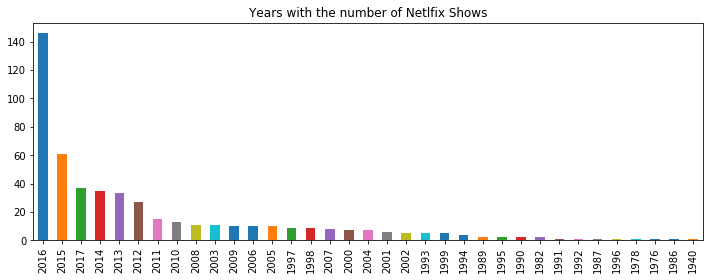

In [7]:
print("The Year-wise distribution of Netflix shows")
year_no_of_shows=df["release year"].value_counts().sort_values(ascending=False)
plt.figure(figsize=(12,4))
year_no_of_shows.plot(title='Years with the number of Netlfix Shows',kind="bar")

The Top 5 years with **most number of shows**:

 1. 2016
 2. 2015
 3. 2017
 4. 2014
 5. 2013

In [9]:
print('The number of Netflix Shows in the dataset are: ',df['title'].nunique())

The number of Netflix Shows in the dataset are:  496


## How is the Rating distribution? ##

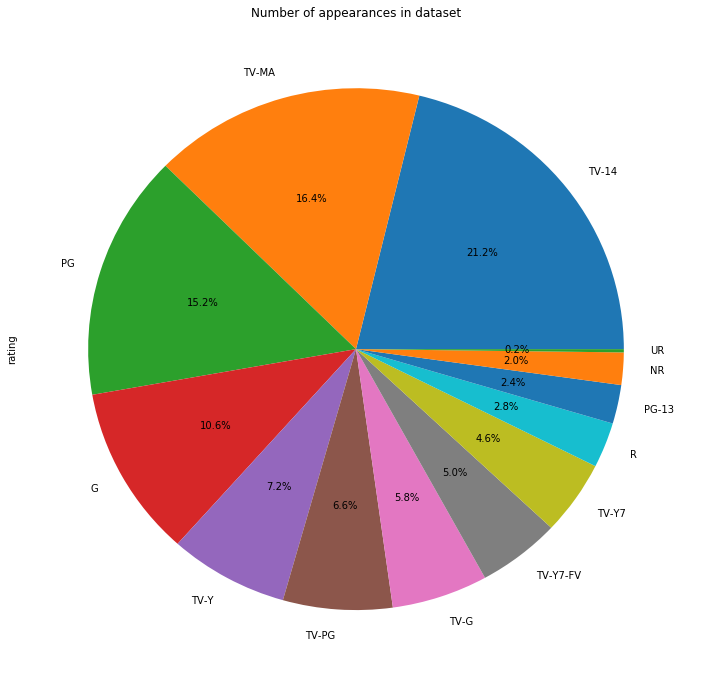

In [8]:
plt.figure(figsize=(12,12))
df.rating.value_counts().plot(kind='pie',autopct='%1.1f%%')
plt.title('Number of appearances in dataset')
plt.show()

Most **'ratings'** in the dataset are:

 1. TV-14
 2. PG
 3. TV-MA
 4. G
 5. TV-Y



## Data Description ##

In [10]:
df.describe()

,ratingDescription,release year,user rating score,user rating size
count,500.000000,500.000000,256.000000,500.000000
mean,68.754000,2010.976000,81.398438,80.972000
std,31.505089,7.829305,12.730904,0.998604
min,10.000000,1940.000000,55.000000,80.000000
25%,41.000000,2009.000000,71.000000,80.000000
50%,70.000000,2014.000000,83.500000,80.000000
75%,90.000000,2016.000000,93.000000,82.000000
max,124.000000,2017.000000,99.000000,82.000000


## What is the most frequent range of User Rating Scores? ##

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41]),
 <a list of 42 Text xticklabel objects>)

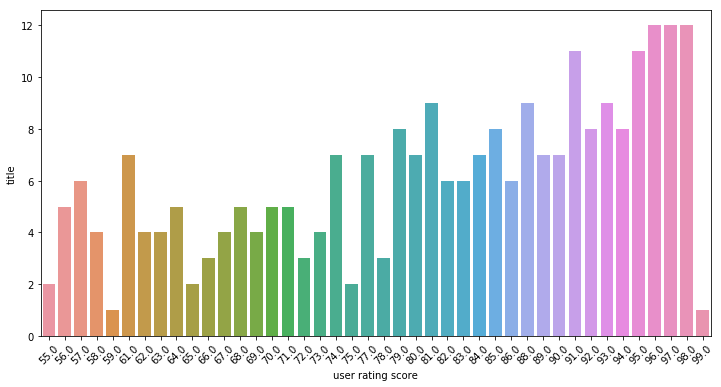

In [11]:
user_rating_score=df.groupby("user rating score")['title'].count().reset_index().sort_values(by='user rating score',ascending=False).reset_index(drop=True)
plt.figure(figsize=(12,6))
sns.barplot(x='user rating score',y='title', data=user_rating_score)
plt.xticks(rotation=45)


The above graph plot shows the distribution of User Rating Scores. Ranges of scores from **91-98** seem to be more frequent. 

## Year-wise Ratings ##

In [12]:
print('The Ratings along with their occurence in every year:')
df.groupby((['release year', 'rating'])).size()


The Ratings along with their occurence in every year:


release year  rating  
1940          G            1
1976          G            1
1978          PG           1
1982          G            1
              PG           1
1986          G            1
1987          PG           1
1989          PG           1
              TV-Y7        1
1990          G            1
              TV-Y7        1
1991          G            1
1992          G            1
1993          G            2
              PG           2
              TV-Y         1
1994          PG           4
1995          G            1
              PG           1
1996          TV-Y7-FV     1
1997          G            3
              PG           3
              TV-Y         1
              TV-Y7        1
              TV-Y7-FV     1
1998          G            3
              PG           3
              PG-13        1
              TV-G         1
              TV-Y7        1
                          ..
2014          TV-Y         2
              TV-Y7        3
              TV-Y7-

## Average User Rating Score of Different Ratings by Years ##

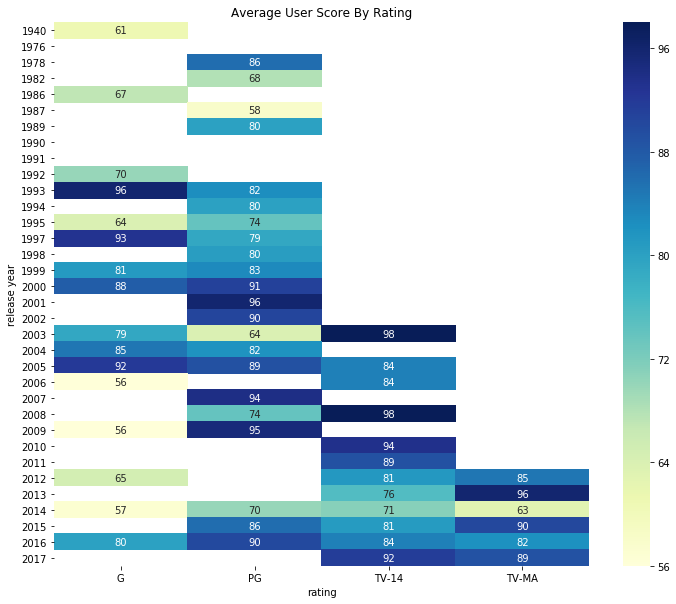

In [13]:
plt.subplots(figsize=(12,10))
max_ratings=df.groupby('rating')['rating'].count()
max_ratings=max_ratings[max_ratings.values>50]
max_ratings.sort_values(ascending=True,inplace=True)
mean_shows=df[df['rating'].isin(max_ratings.index)]
piv=mean_shows.groupby(['release year','rating'])['user rating score'].mean().reset_index()
piv=piv.pivot('release year','rating','user rating score')
sns.heatmap(piv,annot=True,cmap='YlGnBu')
plt.title('Average User Score By Rating')
plt.show()

## What's with 'Rating Level'? ##

In [15]:
df1=df[df['ratingLevel'].notnull()]

 - Removing rows with no values

In [16]:
string=StringIO()
df1['ratingLevel'].apply(lambda x: string.write(x))
x=string.getvalue()
string.close()
x=x.lower()
x=x.split()

In [17]:
words = co.Counter(nltk.corpus.words.words())
stopWords =co.Counter( nltk.corpus.stopwords.words() )
x=[i for i in x if i in words and i not in stopWords]
string=" ".join(x)
c = co.Counter(x)

In [18]:
most_common_10=c.most_common(10)
print('The 10 Most Common Words in ratingLevel are: ')
most_common_10

The 10 Most Common Words in ratingLevel are: 


[('may', 206),
 ('suitable', 155),
 ('strongly', 101),
 ('unsuitable', 100),
 ('mature', 61),
 ('guidance', 43),
 ('content', 31),
 ('fantasy', 25),
 ('rude', 24),
 ('language', 18)]

In [19]:
text = string
wordcloud2 = WordCloud(stopwords=STOPWORDS,
                          background_color='white',
                          width=8000,
                          height=5000,
                          relative_scaling = 1.0).generate(text)
plt.imshow(wordcloud2)
plt.axis("off")
plt.show()

KeyboardInterrupt: 

## What are the Popular Shows? ##

In [ ]:
wordcloud1 = WordCloud(
                          background_color='black',
                          width=8000,
                          height=5000,
                          relative_scaling = 1.0
                         ).generate(" ".join(df['title']))
plt.imshow(wordcloud1)
plt.axis('off')
plt.show()